In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/home/tom/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import sys
sys.path.append("/Users/tlee010/Desktop/github_repos/fastai/") # go to parent dir

from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display

from sklearn import metrics

In [3]:
set_plot_sizes(12,10,10)

In [4]:
df_raw = pd.read_json('https://pomber.github.io/covid19/timeseries.json', orient='records')
df = pd.DataFrame()
df_raw.loc[:,(['Argentina', 'Spain'])]

,Argentina,Spain
0,"{'date': '2020-1-22', 'confirmed': 0, 'deaths'...","{'date': '2020-1-22', 'confirmed': 0, 'deaths'..."
1,"{'date': '2020-1-23', 'confirmed': 0, 'deaths'...","{'date': '2020-1-23', 'confirmed': 0, 'deaths'..."
2,"{'date': '2020-1-24', 'confirmed': 0, 'deaths'...","{'date': '2020-1-24', 'confirmed': 0, 'deaths'..."
3,"{'date': '2020-1-25', 'confirmed': 0, 'deaths'...","{'date': '2020-1-25', 'confirmed': 0, 'deaths'..."
4,"{'date': '2020-1-26', 'confirmed': 0, 'deaths'...","{'date': '2020-1-26', 'confirmed': 0, 'deaths'..."
...,...,...
79,"{'date': '2020-4-10', 'confirmed': 1975, 'deat...","{'date': '2020-4-10', 'confirmed': 158273, 'de..."
80,"{'date': '2020-4-11', 'confirmed': 1975, 'deat...","{'date': '2020-4-11', 'confirmed': 163027, 'de..."
81,"{'date': '2020-4-12', 'confirmed': 2142, 'deat...","{'date': '2020-4-12', 'confirmed': 166831, 'de..."
82,"{'date': '2020-4-13', 'confirmed': 2208, 'deat...","{'date': '2020-4-13', 'confirmed': 170099, 'de..."


In [5]:
for row in df_raw.loc[:, 'Argentina']:
    row['country'] = 'Argentina'

for row in df_raw.loc[:, 'Spain']:
    row['country'] = 'España'

#df = pd.DataFrame([row for row in df_raw.loc[:,'Argentina']   ], columns=columns)

Dates = pd.Series([row['date'] for row in df_raw.loc[:, 'Spain']], name='date', dtype='datetime64[ns]')
Deaths = pd.Series([row['deaths'] for row in df_raw.loc[:, 'Spain']], name='date', dtype='int32')
Confirmed = pd.Series([row['confirmed'] for row in df_raw.loc[:, 'Spain']], name='date', dtype='int32')
Recovered = pd.Series([row['recovered'] for row in df_raw.loc[:, 'Spain']], name='date', dtype='int32')

frame = {'date': Dates, 'deaths': Deaths, 'confirmed': Confirmed, 'recovered': Recovered}
df_spain = pd.DataFrame(frame)
df_spain['country'] = 'España'
df_spain

,date,deaths,confirmed,recovered,country
0,2020-01-22,0,0,0,España
1,2020-01-23,0,0,0,España
2,2020-01-24,0,0,0,España
3,2020-01-25,0,0,0,España
4,2020-01-26,0,0,0,España
...,...,...,...,...,...
79,2020-04-10,16081,158273,55668,España
80,2020-04-11,16606,163027,59109,España
81,2020-04-12,17209,166831,62391,España
82,2020-04-13,17756,170099,64727,España


In [6]:
Dates = pd.Series([row['date'] for row in df_raw.loc[:, 'Argentina']], name='date', dtype='datetime64[ns]')
Deaths = pd.Series([row['deaths'] for row in df_raw.loc[:, 'Argentina']], name='date', dtype='int32')
Confirmed = pd.Series([row['confirmed'] for row in df_raw.loc[:, 'Argentina']], name='date', dtype='int32')
Recovered = pd.Series([row['recovered'] for row in df_raw.loc[:, 'Argentina']], name='date', dtype='int32')

frame = {'date': Dates, 'deaths': Deaths, 'confirmed': Confirmed, 'recovered': Recovered}
df_arg = pd.DataFrame(frame)
df_arg['country'] = 'Argentina'
df_arg

,date,deaths,confirmed,recovered,country
0,2020-01-22,0,0,0,Argentina
1,2020-01-23,0,0,0,Argentina
2,2020-01-24,0,0,0,Argentina
3,2020-01-25,0,0,0,Argentina
4,2020-01-26,0,0,0,Argentina
...,...,...,...,...,...
79,2020-04-10,82,1975,375,Argentina
80,2020-04-11,83,1975,440,Argentina
81,2020-04-12,90,2142,468,Argentina
82,2020-04-13,97,2208,515,Argentina


In [7]:
df = df_arg.append(df_spain)

df.reset_index(inplace=True)

In [8]:
os.makedirs('tmp', exist_ok=True)
df.to_feather('tmp/data_covid19-raw')

In [9]:
df = pd.read_feather('tmp/data_covid19-raw')
df

,index,date,deaths,confirmed,recovered,country
0,0,2020-01-22,0,0,0,Argentina
1,1,2020-01-23,0,0,0,Argentina
2,2,2020-01-24,0,0,0,Argentina
3,3,2020-01-25,0,0,0,Argentina
4,4,2020-01-26,0,0,0,Argentina
...,...,...,...,...,...,...
155,75,2020-04-06,13341,136675,40437,España
156,76,2020-04-07,14045,141942,43208,España
157,77,2020-04-08,14792,148220,48021,España
158,78,2020-04-09,15447,153222,52165,España


In [9]:
df_arg['afectados'] = df_arg['confirmed'] + df_arg['deaths'] + df_arg['recovered']

df_arg['infect'] = df_arg['confirmed'] - df_arg['confirmed'].shift()

Analyzin through 37 days


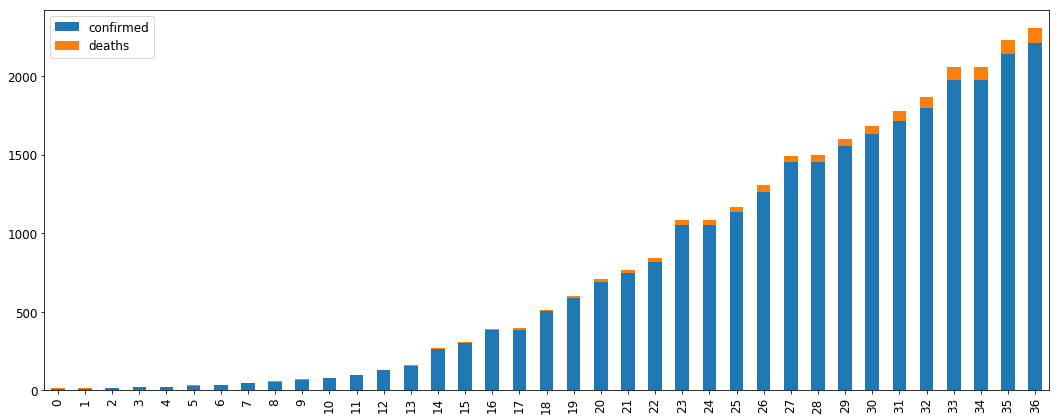

In [10]:
size = df_arg[df_arg['confirmed'] > 10].index.max() - df_arg[df_arg['confirmed'] > 10].index.min()
print(f'Analyzin through {size} days')

y_arg = df_arg[df_arg['confirmed'] > 10][0:size]
y_arg.reset_index(inplace=True)

y_arg.plot(kind='bar', stacked=True , y=['confirmed', 'deaths'], figsize=(18, 7))

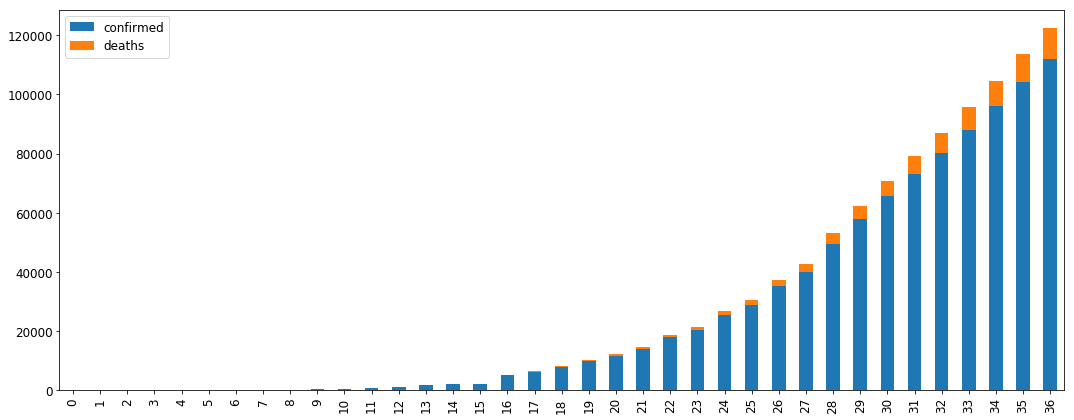

In [11]:
df_spain['afectados'] = df_spain['confirmed'] + df_spain['deaths'] + df_spain['recovered']
df_spain['infect'] = df_spain['confirmed'] - df_spain['confirmed'].shift()

y_spain = df_spain[df_spain['confirmed'] > 10][0:size]
y_spain.reset_index(inplace=True)
y_spain.plot(kind='bar',stacked=True , y=['confirmed', 'deaths'], figsize=(18, 7))

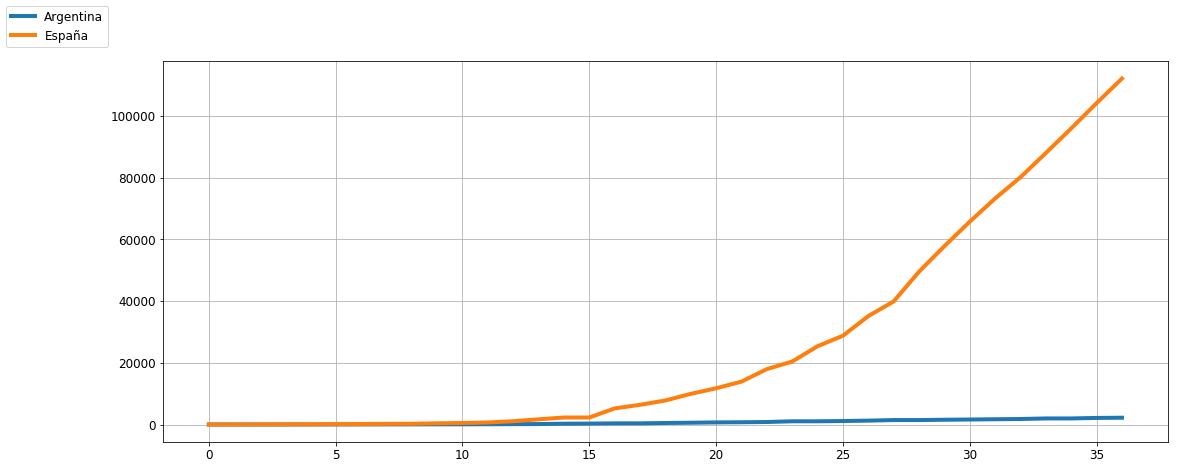

In [12]:
fig = plt.figure(figsize=(18, 7))
plt.plot(y_arg['confirmed'], label='Argentina', linewidth=4)
plt.plot(y_spain['confirmed'], label='España', linewidth=4)
fig.legend(loc="upper left")
plt.grid()
plt.show()

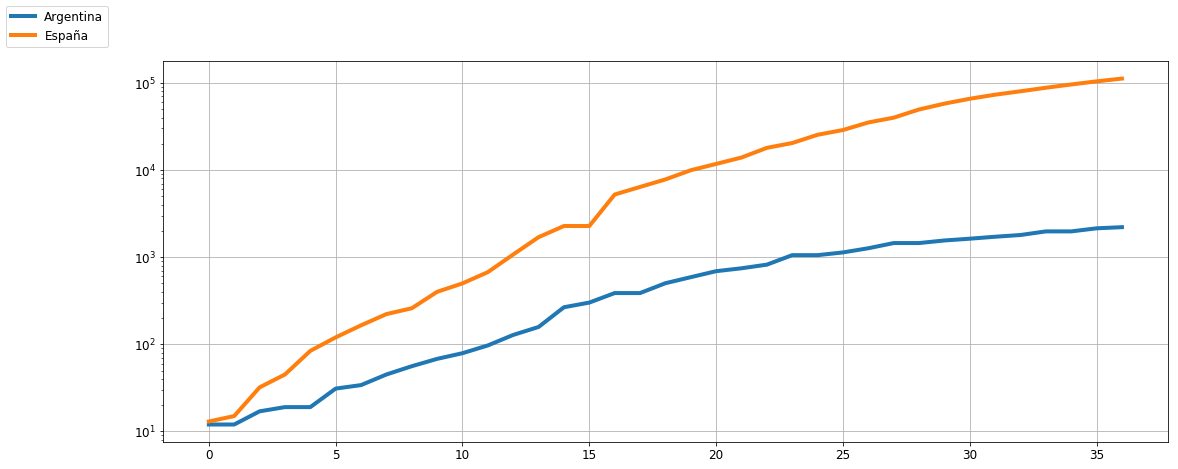

In [13]:
fig = plt.figure(figsize=(18, 7))
p1 = plt.plot(y_arg['confirmed'], label='Argentina', linewidth=4)
p2 = plt.plot(y_spain['confirmed'], label='España', linewidth=4)
plt.yscale("log")
fig.legend(loc="upper left")
plt.grid()
plt.show()